In [90]:
import numpy as np
import torch
import os

from mpl_toolkits import mplot3d
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [91]:
import json
data = json.load(open('./data/lego/transforms_train.json', 'r'))
transforms = np.array([data['frames'][i]['transform_matrix'] for i in range(len(data['frames']))])
translations = transforms[:,0:3,3] # camera origins in world frame

In [92]:
# Camera frame unit vectors in world frame
X_c2w = transforms[:,0:3,0] + translations
Y_c2w = transforms[:,0:3,1] + translations
Z_c2w = transforms[:,0:3,2] + translations
print(X_c2w.shape)

(100, 3)


In [93]:
# Plotting camera frame in world frame
line_segs = []
for c2w in [X_c2w,Y_c2w,Z_c2w]:
    ls = np.concatenate((translations,c2w), axis=1)
    ls = np.reshape(ls,(-1,2,3))
    line_segs.append(ls)

<IPython.core.display.Javascript object>


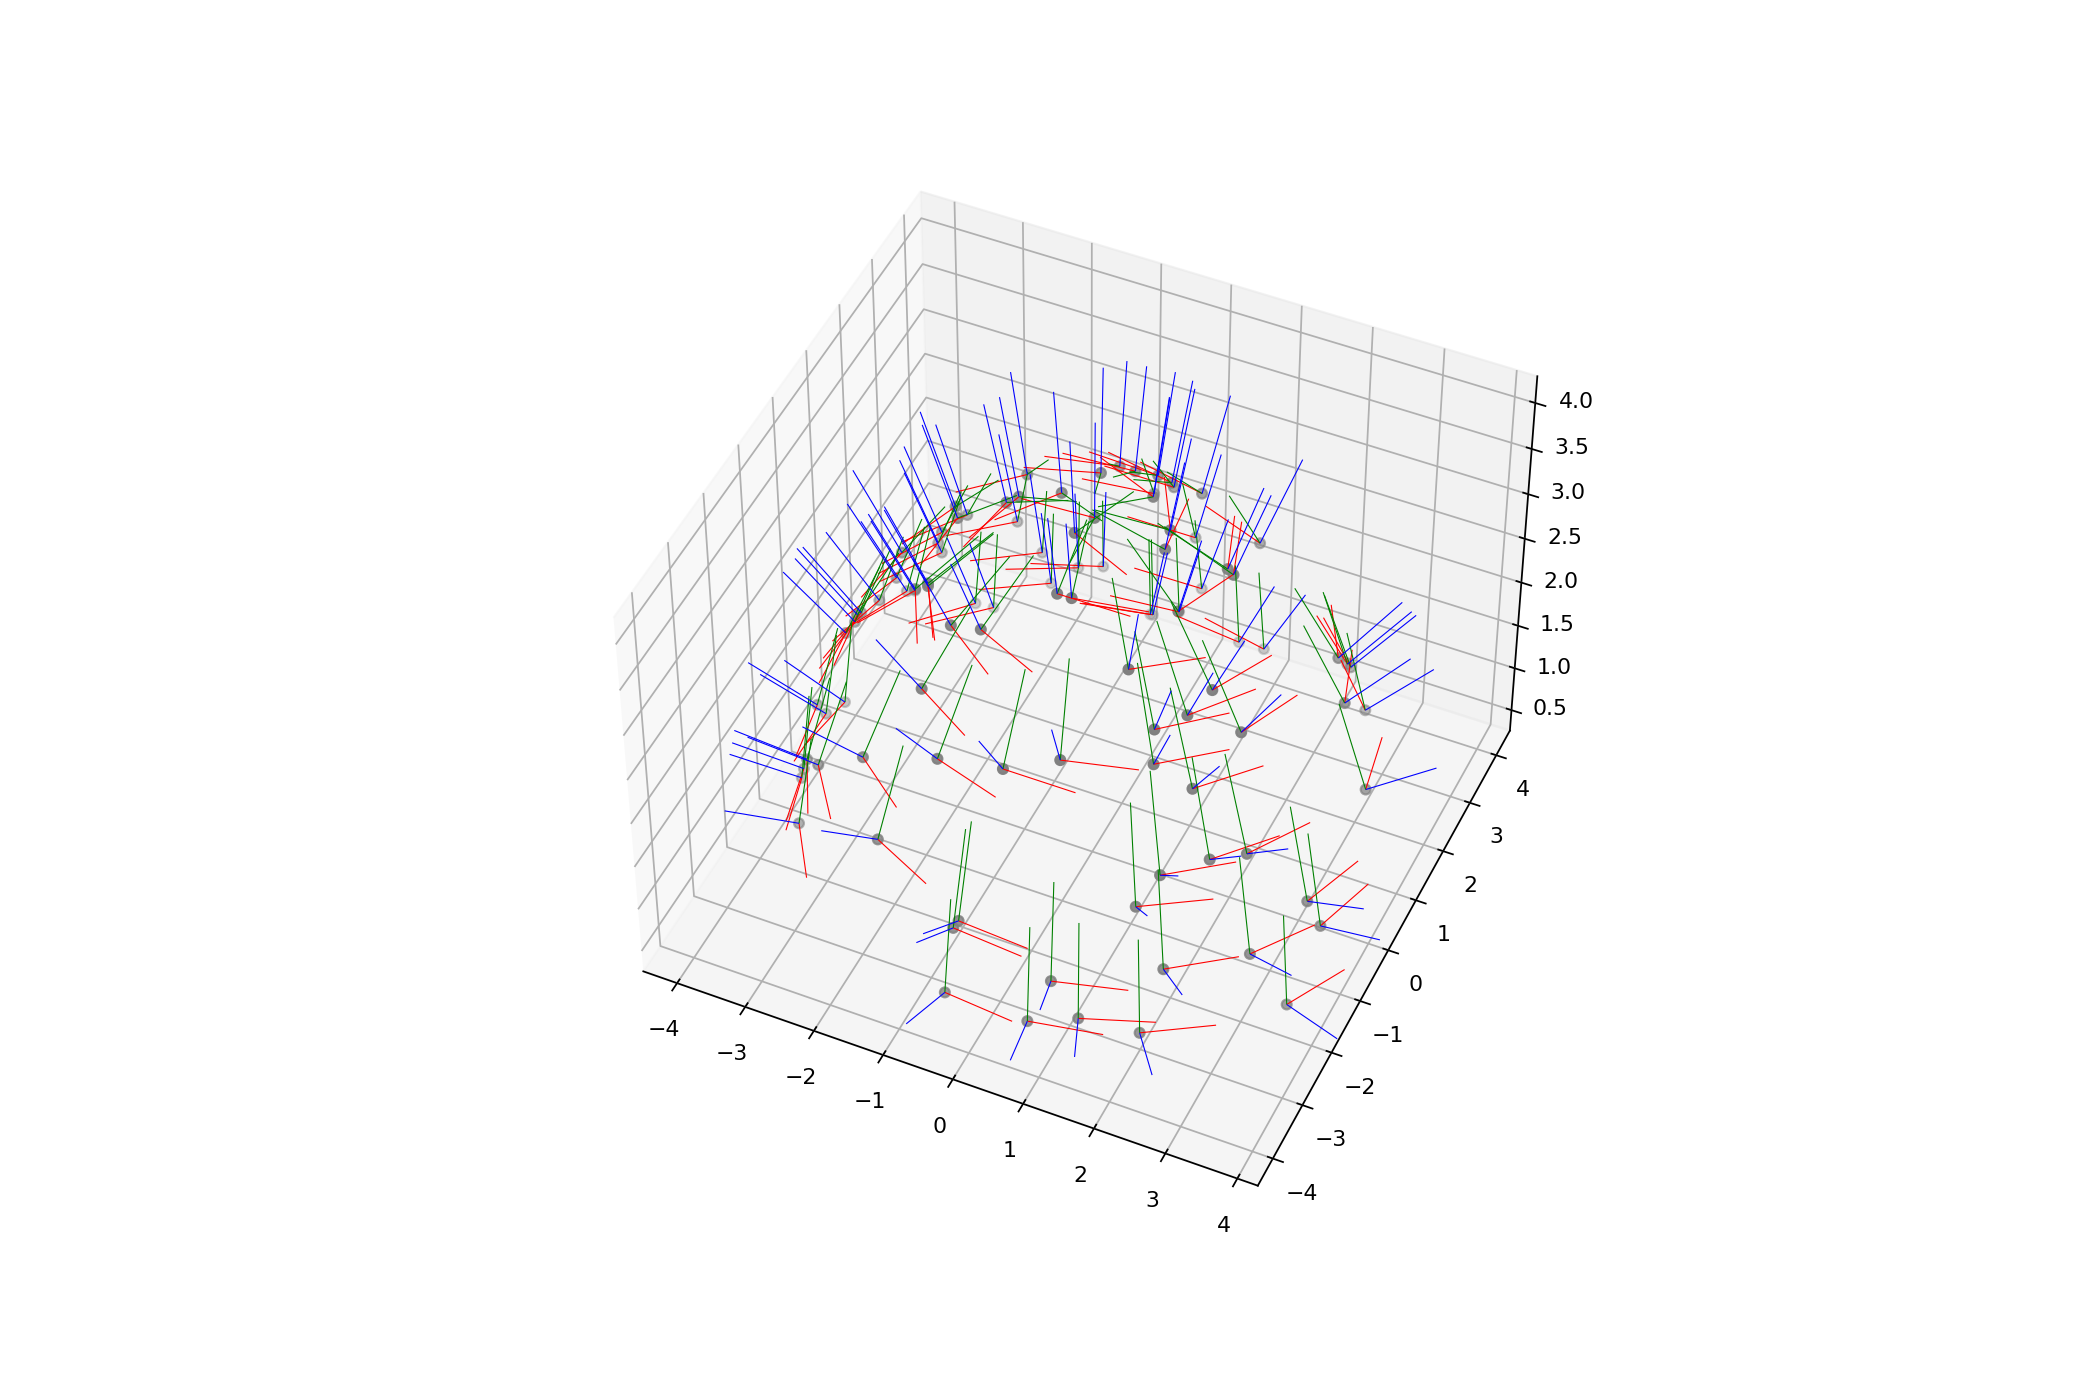

In [95]:
fig = plt.figure()
ax = plt.axes(projection='3d')
k=100
# translation / camera centers
ax.scatter3D(translations[:k,0],translations[:k,1],translations[:k,2],c='gray')
# camera x-axis
lc = Line3DCollection(line_segs[0], linewidths=0.5, colors='r')
ax.add_collection(lc)
# camera y-axis
lc = Line3DCollection(line_segs[1], linewidths=0.5, colors='g')
ax.add_collection(lc)
# camera z-axis
lc = Line3DCollection(line_segs[2], linewidths=0.5, colors='b')
ax.add_collection(lc)


In [ ]:
# ==> When dealing with camera rays, don't invert transform_matrix.
#     But remember z-axis is being reversed.